In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

In [5]:
?np.random.randn

In [164]:
# Perceptron Learning algorithm
class Perceptron:
    def __init__(self, learning_rate=1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        iters = 0
        while True:
            ans = 0
            for j, x in enumerate(X):
                prediction = np.dot(x, self.weights) + self.bias
                if (y[j] * prediction) <= 0:
                    self.weights += self.learning_rate * y[j] * x
                    self.bias += self.learning_rate * y[j]
                    ans += 1
            if ans == 0:
                return iters
            iters += ans

#         for i in range(10):
#             for j, x in enumerate(X):
#                 prediction = np.dot(x, self.weights) + self.bias
#                 if (y[j] * prediction) <= 0:
#                     self.weights += self.learning_rate * y[j] * x
#                     self.bias += self.learning_rate * y[j]
#                     iters += 1
        return iters
                    

    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.bias
        predictions[predictions <= 0] = -1
        predictions[predictions > 0] = 1
        return predictions

In [10]:
# Generating linearly separable dataset
def generate_data(sep=1, data_points=1000):
    np.random.seed(73)
    class1, class2 = [], []
    y1, y2 = [], []

    while len(class1) < data_points:
        X = np.random.randn(2)
        if X[0] + X[1] > sep/2:
            class1.append(X)
            y1.append(1)
        
    while len(class2) < data_points:
        X = np.random.randn(2)
        if X[0] + X[1] < -sep/2:
            class2.append(X)
            y2.append(-1)
        
    class1.extend(class2)
    y1.extend(y2)
    X = np.array(class1)
    y = np.array(y1)
    
    return X, y

X, y = generate_data()

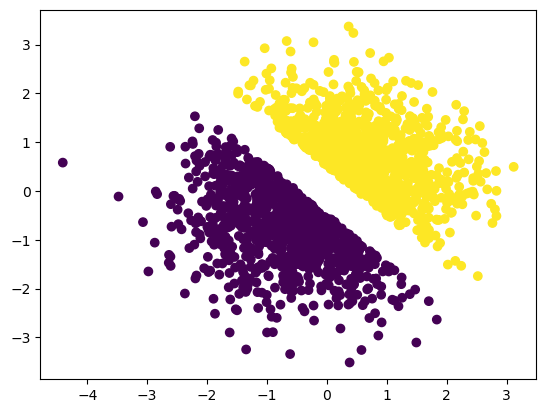

In [16]:
x,y=generate_data(sep=1)
plt.scatter(x[:,0], x[:,1], c=y)

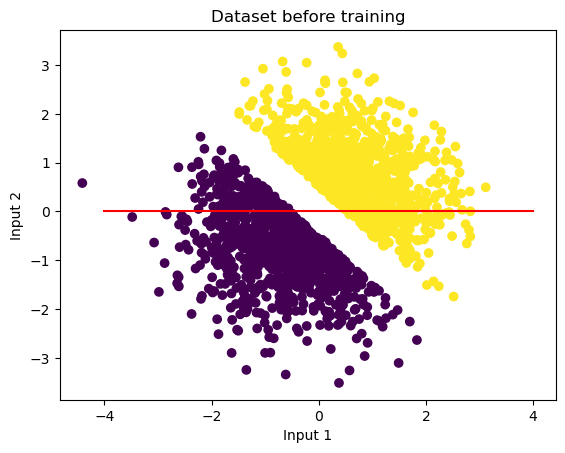

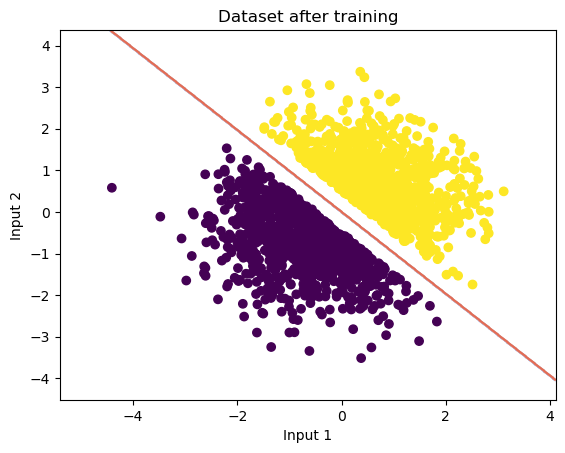

In [178]:
# Plotting dataset and decision boundary before training
plt.scatter(X[:,0], X[:,1], c=y)
a = np.linspace(-4,4,100)
b = np.zeros(100,) 
plt.plot(a, b, '-r')
plt.title("Dataset before training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
# plt.legend()
plt.show()

# Training perceptron model
model = Perceptron()
iters = model.fit(X, y)

# Plotting dataset and decision boundary after training
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset after training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
# plt.legend()
plt.show()


In [167]:
gamma_arr = [0.2, 0.4, 0.6, 0.8, 1]

In [174]:
np.random.seed(46)
weights = np.random.randn(2).reshape(-1, 1)
bias = np.random.randn()
k_avg = []
for gamma in gamma_arr:
    iters_arr = []
    for _ in range(5):
        X, y = generate_data(sep=gamma)
        model = Perceptron()
        it = model.fit(X, y)
        iters_arr.append(it)
    k_avg.append(sum(iters_arr) / len(iters_arr))

print(k_avg)

[22.4, 13.6, 10.4, 8.0, 5.8]


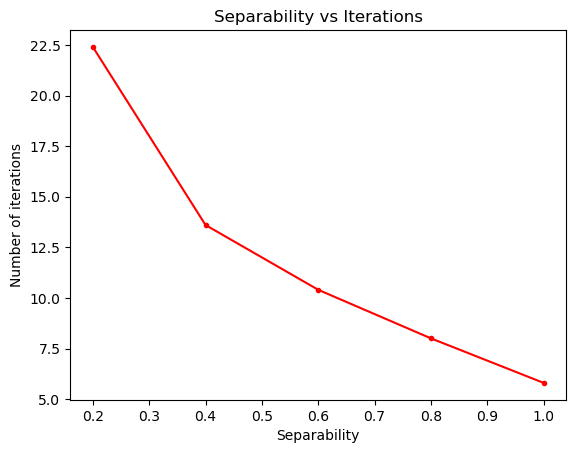

In [176]:
plt.plot(gamma_arr, k_avg, 'r.-')
plt.title("Separability vs Iterations")
plt.xlabel("Separability")
plt.ylabel("Number of iterations")
plt.show()

## Question 2

In [227]:
class LinearClassifier():
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def BCELoss(self, true_label, pred_label):
        loss = 0
        for i in range(len(true_label)):
            if pred_label[i] == 0:  
                val1 = 0
            else: 
                val1 = np.log2(pred_label[i])

            if pred_label[i] == 1: 
                val2 = 0
            else: 
                val2 = np.log2(1 - pred_label[i])
                
            temp = true_label[i] * val1 + (1 - true_label[i]) * val2
            loss += temp / len(true_label)
        
        return -1 * loss

    def fit(self, X, y):
        los = []
        self.weights = np.random.randn(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for i in range(self.epochs):
            predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            errors = predictions - y
            loss = self.BCELoss(y, predictions)
            
            gradient_weights = np.dot(X.T, errors) / X.shape[0]
            gradient_bias = errors.mean()
            
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # upred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            # uloss = self.BCELoss(y, predictions) # Calculating updated loss

            los.append(loss)
            if i % 10 == 0:
                print(f'Epoch: {i} -> Loss : {loss}')
        print("========================")
        print("Training complete!")
        self.plot(los)
                

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
        predictions[predictions <= 0.5] = 0
        predictions[predictions > 0.5] = 1
        return predictions

    def plot(self, loss):
        plt.plot(loss[20:])
        plt.ylabel("Loss")
        plt.title("Loss vs. Epochs")
        plt.xlabel("Number of epochs")
        plt.show()

In [242]:
def generate_data(sep=1, data_points=1000):
    np.random.seed(83)
    class1, class2 = [], []
    y1, y2 = [], []

    while len(class1) < data_points:
        X = np.random.randn(2)
        if X[0] + X[1] > sep/2:
            class1.append(X)
            y1.append(1)
        
    while len(class2) < data_points:
        X = np.random.randn(2)
        if X[0] + X[1] < -sep/2:
            class2.append(X)
            y2.append(0)
        
    class1.extend(class2)
    y1.extend(y2)
    X = np.array(class1)
    y = np.array(y1)
    
    return X, y

X, y = generate_data(0.8)

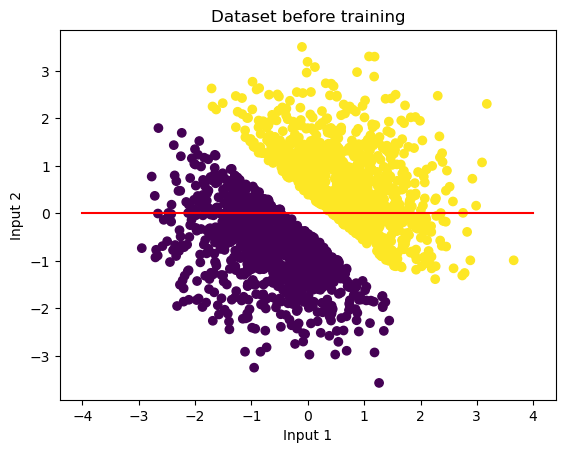

In [243]:
# Plotting dataset and decision boundary before training
plt.scatter(X[:,0], X[:,1], c=y)
a = np.linspace(-4,4,100)
b = np.zeros(100,) 
plt.plot(a, b, '-r')
plt.title("Dataset before training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
# plt.legend()
plt.show()

In [244]:
model = LinearClassifier(0.5, 1000)

Epoch: 0 -> Loss: Before Update: 2.2570531664726285
Epoch: 10 -> Loss: Before Update: 0.48191545326332835
Epoch: 20 -> Loss: Before Update: 0.2930098456051877
Epoch: 30 -> Loss: Before Update: 0.22066810385853755
Epoch: 40 -> Loss: Before Update: 0.18054390045640636
Epoch: 50 -> Loss: Before Update: 0.15442736736467397
Epoch: 60 -> Loss: Before Update: 0.13581894467660627
Epoch: 70 -> Loss: Before Update: 0.12176239718004214
Epoch: 80 -> Loss: Before Update: 0.11070054169082585
Epoch: 90 -> Loss: Before Update: 0.10172738707686135
Epoch: 100 -> Loss: Before Update: 0.09427637736810116
Epoch: 110 -> Loss: Before Update: 0.08797323482625577
Epoch: 120 -> Loss: Before Update: 0.08255978815470111
Epoch: 130 -> Loss: Before Update: 0.07785162474332245
Epoch: 140 -> Loss: Before Update: 0.0737131639571699
Epoch: 150 -> Loss: Before Update: 0.07004228242609874
Epoch: 160 -> Loss: Before Update: 0.06676045349256761
Epoch: 170 -> Loss: Before Update: 0.06380621032384956
Epoch: 180 -> Loss: Befo

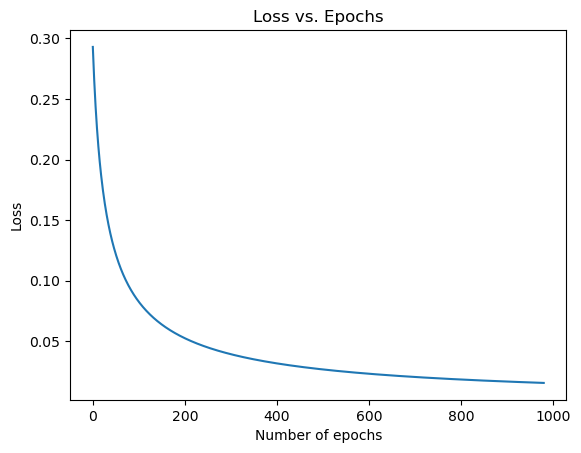

In [245]:
model.fit(X, y)

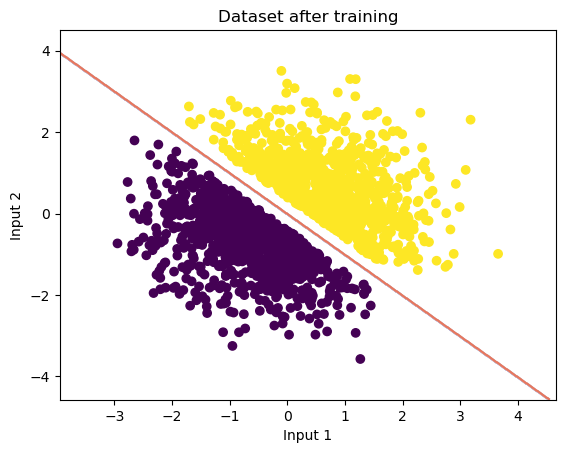

In [246]:
# Plotting dataset and decision boundary after training
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset after training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
# plt.legend()
plt.show()

## Question 3

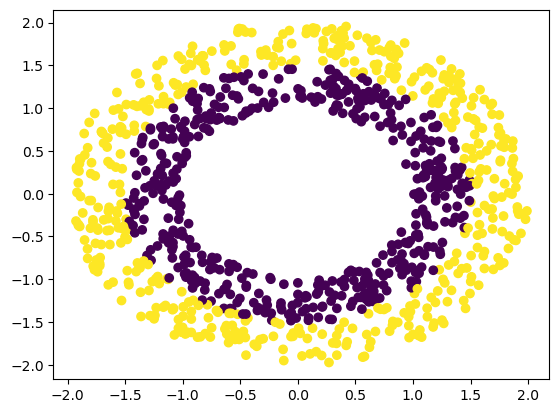

In [285]:
def generate_concentric_circles(n=1000):
    # np.random.seed(0)
    # Generating data points along the circumference of 2 concentric circles
    r1 = 1
    r2 = 2
    angles = np.random.uniform(0, 2 * np.pi, n)
    radii = np.random.uniform(r1, r2, n)
    X = np.zeros((n, 2))
    X[:,0] = radii * np.cos(angles)
    X[:,1] = radii * np.sin(angles)
    y = np.zeros(n)
    y[radii > (r1 + r2) / 2] = 1

    # Plotting the dataset
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()
    
    return X, y

X, y = generate_concentric_circles(n=1000)

In [ ]:
# Sigmoid activation function
class MultiLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

        # Initializing different layer sizes
        self.input_layer_size = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1

        # Initialize the MLP weights and biases
        self.weights1 = np.random.uniform(-1, 1, (self.input_layer_size, self.hidden_layer_size))
        self.weights2 = np.random.uniform(-1, 1, (self.hidden_layer_size, self.output_layer_size))
        self.bias1 = np.random.uniform(-1, 1, (1, self.hidden_layer_size))
        self.bias2 = np.random.uniform(-1, 1, (1, self.output_layer_size))
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Derivative of the sigmoid activation function
    def sigmoid_derivative(x):
        return x * (1 - x)
    
    # Binary Cross Entropy loss
    def BCELoss(self, true_label, pred_label):
        loss = 0
        for i in range(len(true_label)):
            if pred_label[i] == 0:  
                val1 = 0
            else: 
                val1 = np.log2(pred_label[i])

            if pred_label[i] == 1: 
                val2 = 0
            else: 
                val2 = np.log2(1 - pred_label[i])

            temp = true_label[i] * val1 + (1 - true_label[i]) * val2
            loss += temp / len(true_label)

        return -1 * loss

    def fit(self, X, y):
        los = []
        self.weights = np.random.randn(X.shape[1])
        self.bias = 0 
    
        # Training
        for epoch in range(self.epochs):
            # Feed forward
            input_layer = self.sigmoid(np.dot(X, self.weights) + self.bias)
            hidden_layer = self.sigmoid(np.dot(self.input_layer, self.weights1) + self.bias1)
            output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)

            # Calculate the error
            target = y
            error = target - output_layer
            cost = np.mean(error**2)

            # Backpropagation
            d_weights2 = np.dot(hidden_layer.T, error * self.sigmoid_derivative(output_layer))
            d_bias2 = np.sum(error * self.sigmoid_derivative(output_layer), axis=0)
            d_weights1 = np.dot(input_layer.T, np.dot(error * sigmoid_derivative(output_layer), weights2.T) * sigmoid_derivative(hidden_layer))
            d_bias1 = np.sum(np.dot(error * sigmoid_derivative(output_layer), weights2.T) * sigmoid_derivative(hidden_layer), axis=0)

            # Update the weights and biases
            weights2 += self.learning_rate * d_weights2
            bias2 += self.learning_rate * d_bias2
            weights1 += self.learning_rate * d_weights1
            bias1 += self.learning_rate * d_bias1

            if epoch % 100 == 0:
                print("Epoch:", epoch, "Cost:", cost)

    # Test the MLP on new data
    input_layer = # code to get input layer from new data
    hidden_layer = sigmoid(np.dot(input_layer, weights1) + bias1)
    output_layer = sigmoid(np.dot(
